# Experimenting with GANs

## MNIST dataset

In [2]:
#importing the mnist dataset
from keras.datasets import mnist
#loading the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
#reduce the dataset by taking only 1000 images
train_images = train_images[:1000]
train_labels = train_labels[:1000]

#same thing with test images
test_images = test_images[:1000]
test_labels = test_labels[:1000]

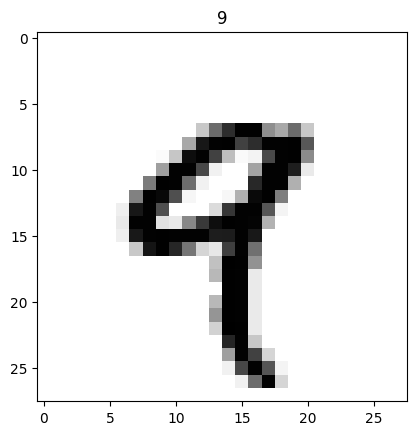

In [4]:
#visualizing the images
import matplotlib.pyplot as plt
digit = train_images[4]
plt.title(train_labels[4])
plt.imshow(digit, cmap=plt.cm.binary)

### Creating a generator

In [1]:
#creating a generator neural net
from keras import models
from keras import layers
generator = models.Sequential()

#adding layers to the generator
#adding input dense layer

generator.add(layers.Conv2D(128, 3, padding = "same",  activation='relu', input_shape=(28,28,1)))
generator.add(layers.Conv2D(64, 3, padding = "same", activation='relu'))
#maxpooling layer
generator.add(layers.Conv2D(32, 3, padding = "same", activation='relu'))
generator.add(layers.Conv2D(128, 3, padding = "same", activation='relu'))
generator.add(layers.Conv2D(64, 3, padding = "same", activation='relu'))
#conv2D output layer with 28,28 image size
generator.add(layers.Conv2D(1, 28, padding = "same", activation='tanh'))
print(generator.output_shape)

# generator.add(layers.MaxPooling2D(2,2)) 
# #flatten
# generator.add(layers.Flatten())
# #a couple of dense layers
# generator.add(layers.Dense(512, activation='relu'))
# generator.add(layers.Dense(256, activation='relu'))
# #output layer
# generator.add(layers.Dense((None,28,28), activation='softmax'))

#show summary
generator.summary()


(None, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       36992     
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 1)         50177     
                                                                 
Total params: 254,497
Trainable params

In [5]:
#compile the model with 5 epochs
generator.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#fit the model to generate images from the mnist dataset not the labels
generator.fit(train_images, train_images, epochs=5, batch_size=128)

Epoch 1/5
2/8 [======>.......................] - ETA: 1:57 - loss: 3635.5854 - accuracy: 0.1593

KeyboardInterrupt: 

In [ ]:
#generate an image
#create noise at 28*28 size
import numpy as np
noise = np.random.normal(0, 1, (28,28))


generated_image = generator.predict(noise)

ValueError: in user code:

    File "c:\Users\YsPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\YsPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\YsPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\YsPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\YsPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\YsPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_9' (type Sequential).
    
    Input 0 of layer "conv2d_31" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 28)
    
    Call arguments received by layer 'sequential_9' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28), dtype=float32)
      • training=False
      • mask=None
